In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [97]:
df = pd.read_csv('/content/Copper_Set.xlsx - Result 1.csv')
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [98]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

**Null values, shape and data types before dealing with incorrect data**


In [99]:
df.shape

(181673, 14)

In [100]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [101]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

**Dealing with data in wrong format**

In [102]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

**Nan values and shape after dealing with data in wrong **

In [103]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)
df.info()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64
(181673, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 

**Dealing with Missing Values**

In [104]:
# material_ref has large set of null values, so replacing them with unknown
df['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.dropna()

In [105]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64
(181631, 14)


In [106]:
df_p=df.copy()

In [108]:
df_p.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816310e+05,1.816310e+05,181631.000000,181631.000000,181631.000000,181631.000000,1.816310e+05,1.816310e+05
mean,5.876231e+03,3.023251e+07,44.893201,25.615974,2.564198,1295.267162,4.740398e+08,1.918367e+03
std,2.349346e+06,1.005626e+05,24.404303,17.753821,6.572637,261.644078,7.175426e+08,3.318331e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.096801e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036395e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716187e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [109]:
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T # quantity and selling price values are not below 0. so we convert to null for below 0 values.


,count,mean,std,min,25%,50%,75%,max
quantity tons,181627.0,5.876372e+03,2.349372e+06,0.00001,1.096885e+01,3.036411e+01,6.716436e+01,1.000000e+09
customer,181631.0,3.023251e+07,1.005626e+05,12458.00000,3.019688e+07,3.020524e+07,3.028042e+07,3.040818e+07
country,181631.0,4.489320e+01,2.440430e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181631.0,2.561597e+01,1.775382e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181631.0,2.564198e+00,6.572637e+00,0.18000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181631.0,1.295267e+03,2.616441e+02,1.00000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181631.0,4.740398e+08,7.175426e+08,611728.00000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181624.0,1.918456e+03,3.318395e+05,0.10000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


**Skewness Handling - Feature Scaling (Log Transformation)**

In [110]:
# find outliers - box plot & skewed data - hist plot and violin plot
import seaborn as sns
import matplotlib.pyplot as plt

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

In [111]:
df.dtypes

id                object
item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

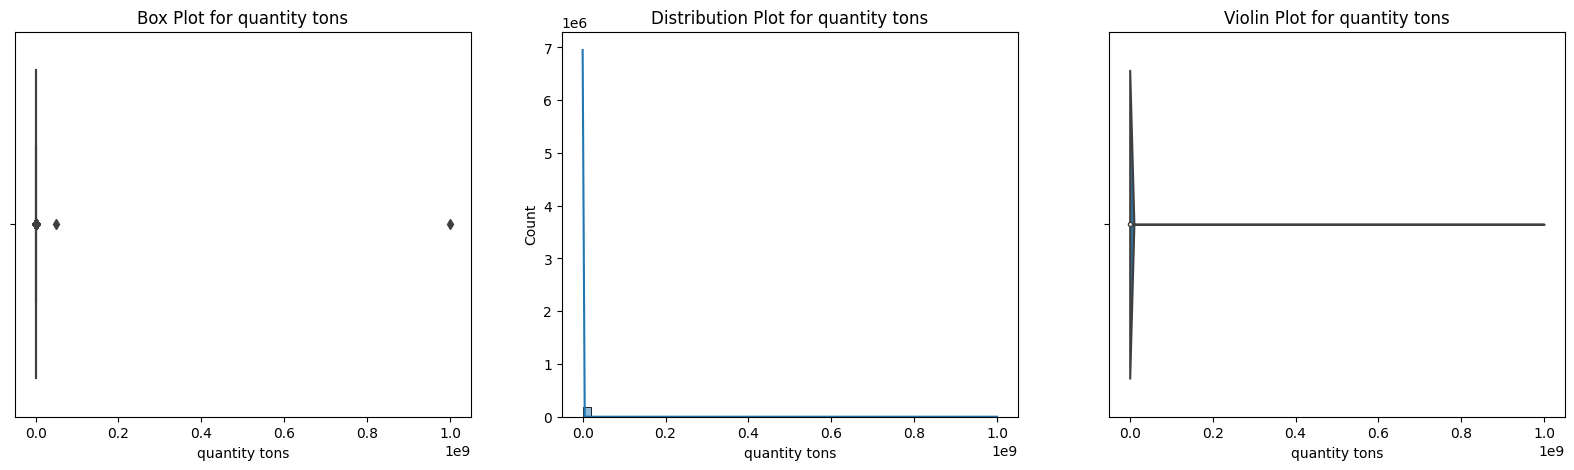

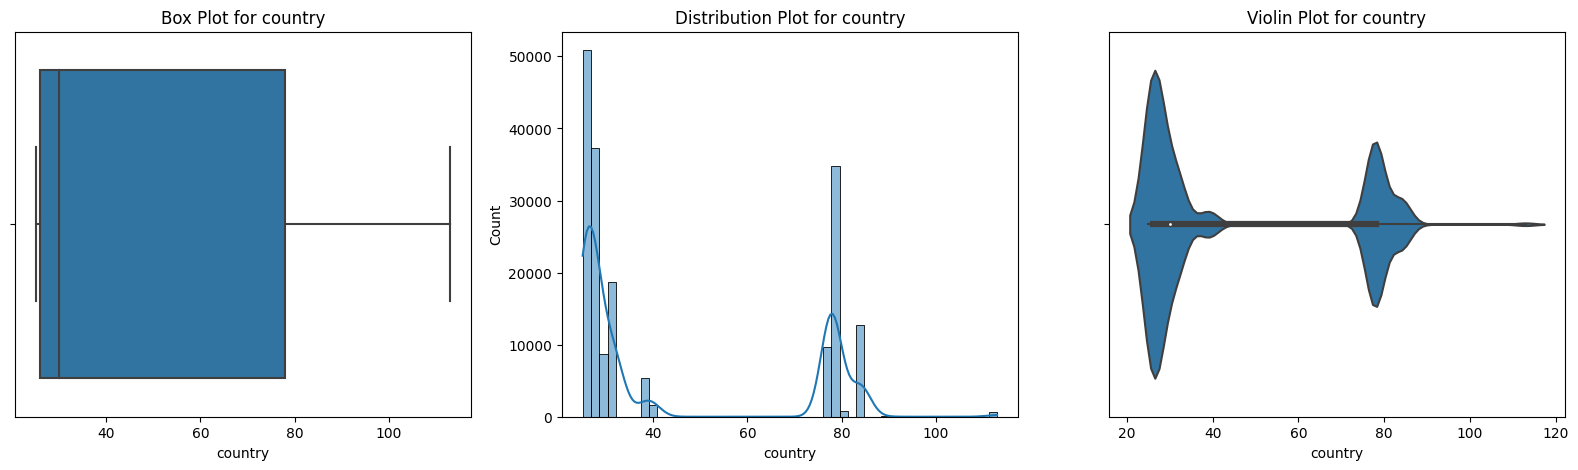

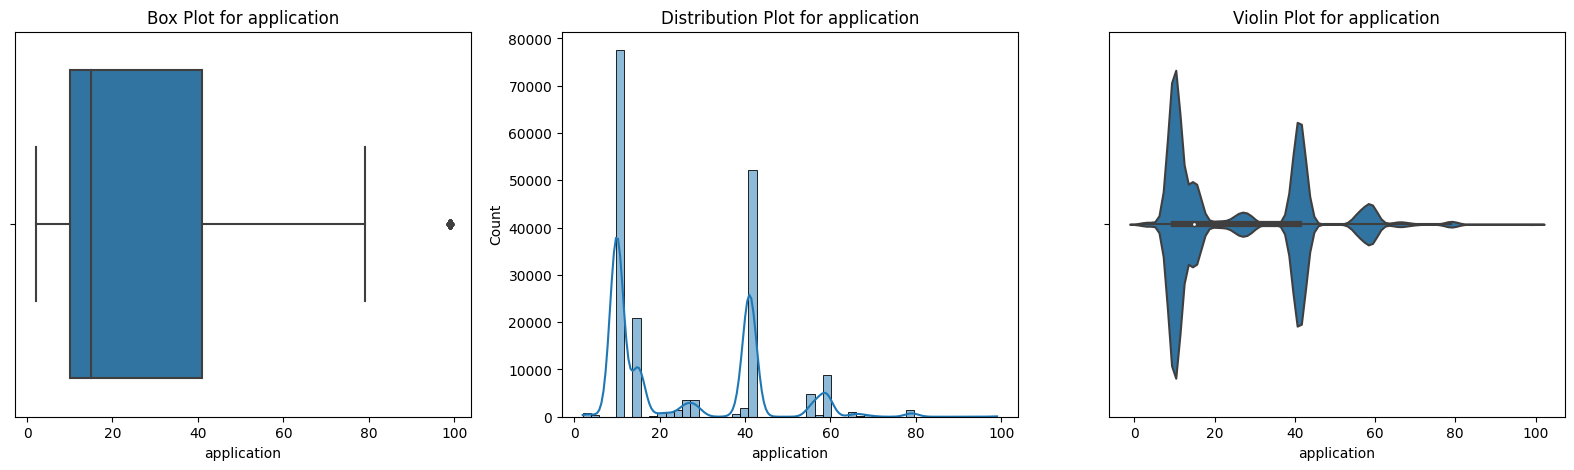

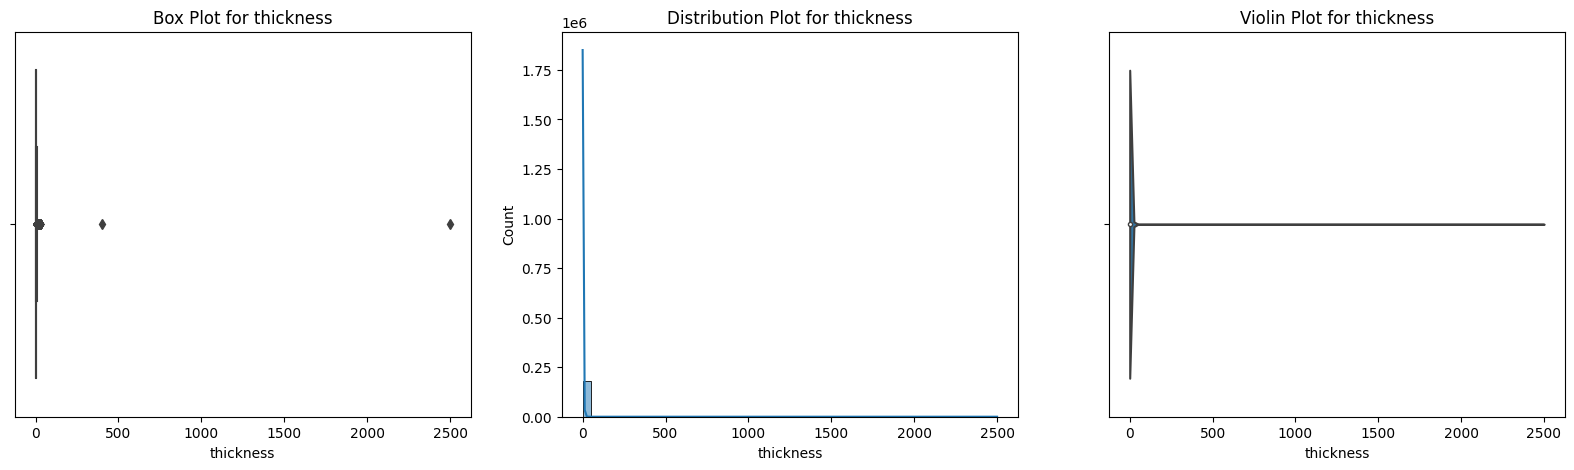

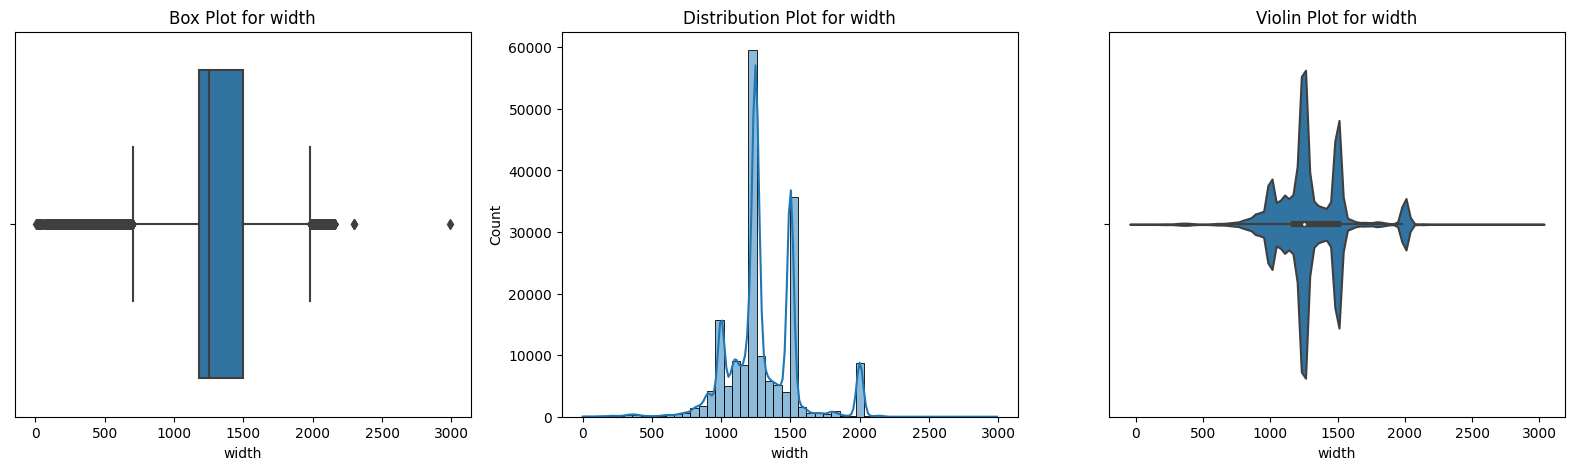

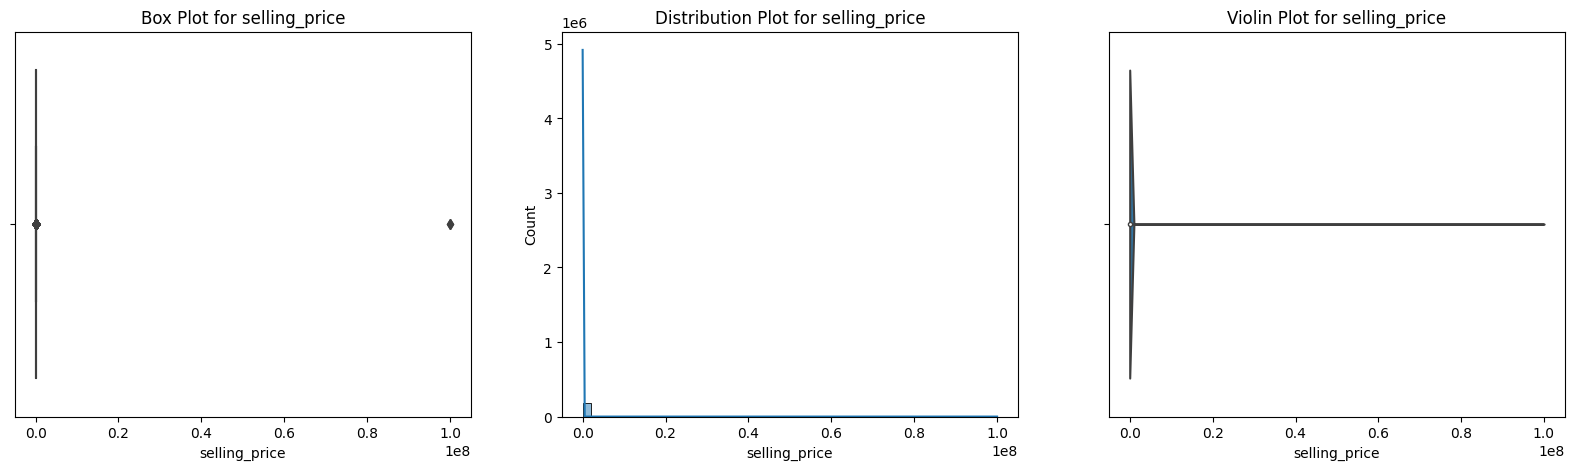

In [112]:
for i in ['quantity tons', 'country', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [113]:
df_p=df.copy()

In [114]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data

df_p['quantity tons_log'] = np.log(df_p['quantity tons'])
df_p['thickness_log'] = np.log(df_p['thickness'])
df_p['selling_price_log'] = np.log(df_p['selling_price'])

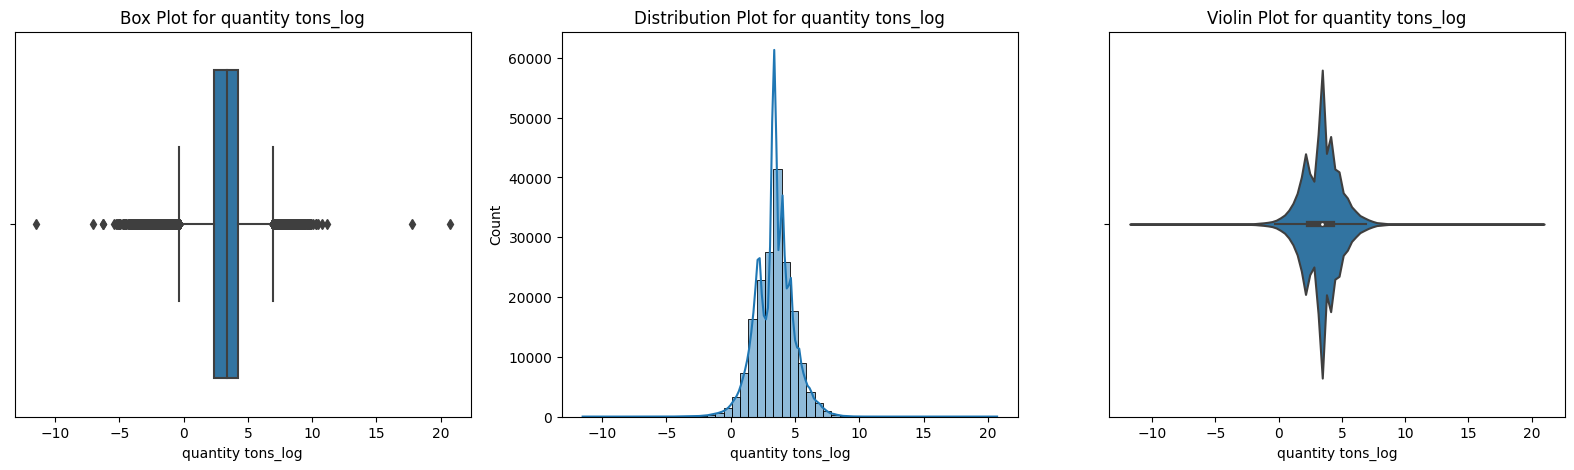

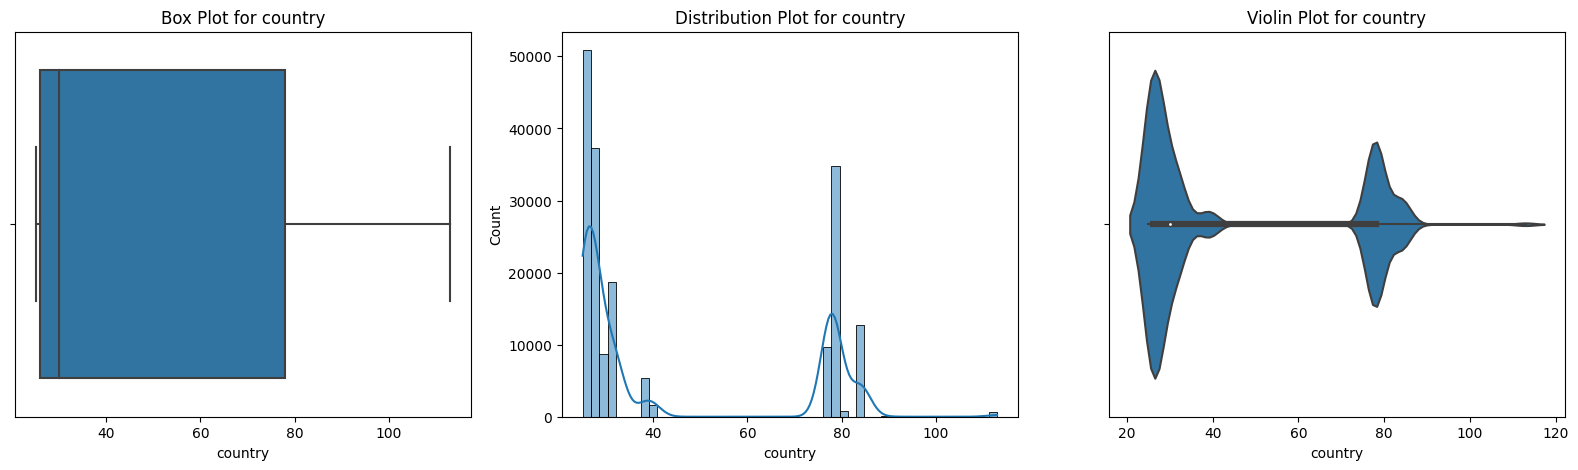

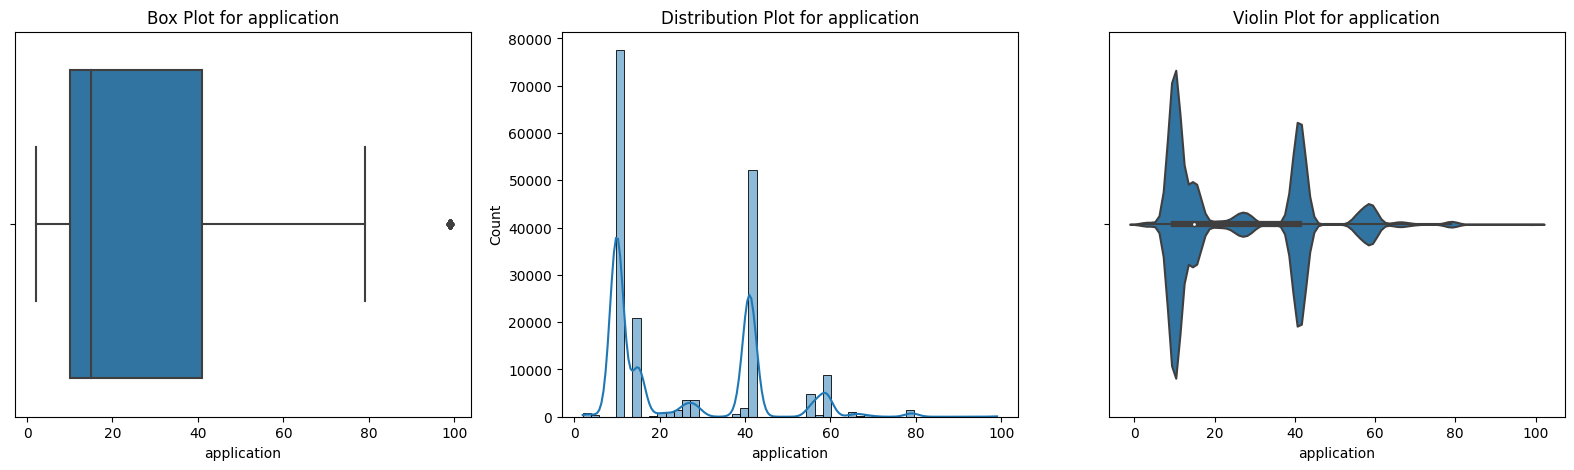

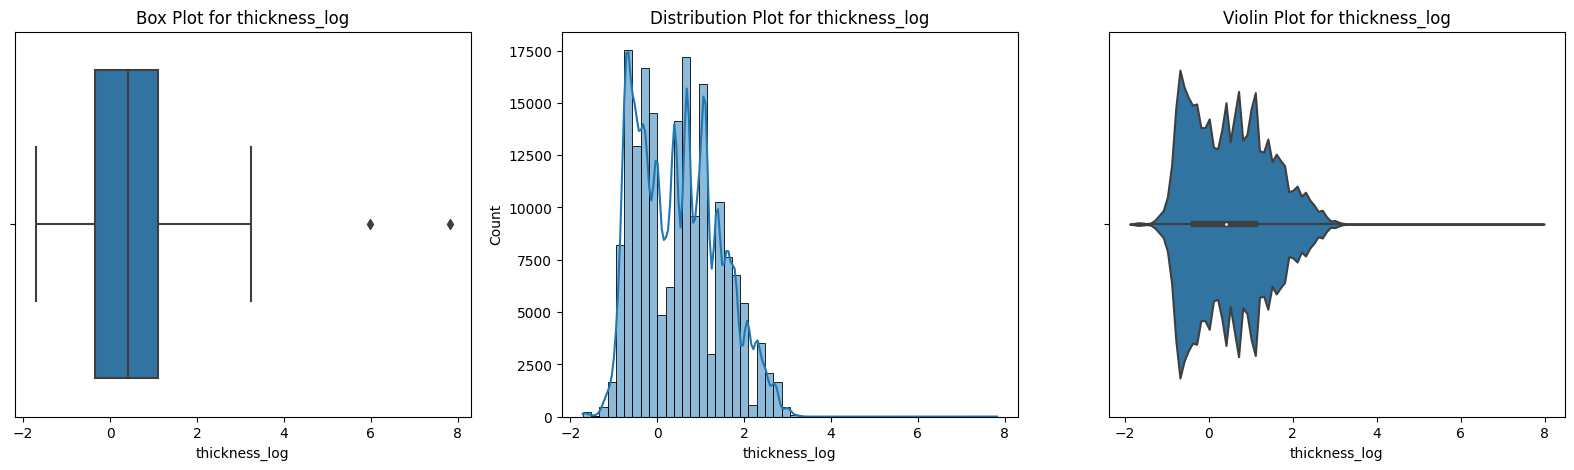

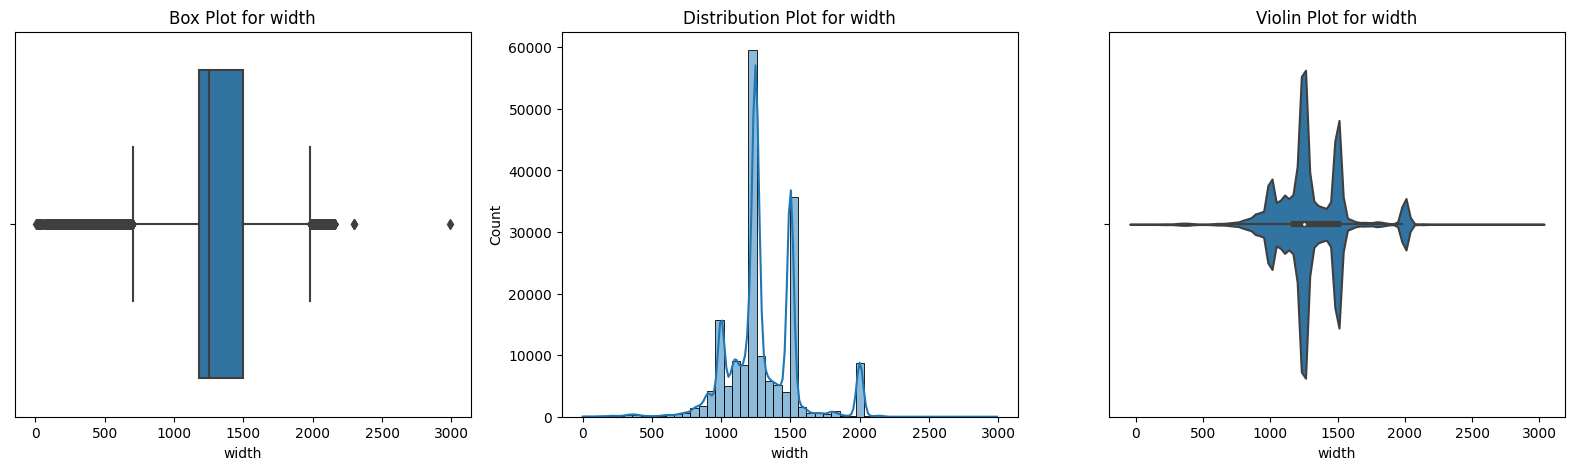

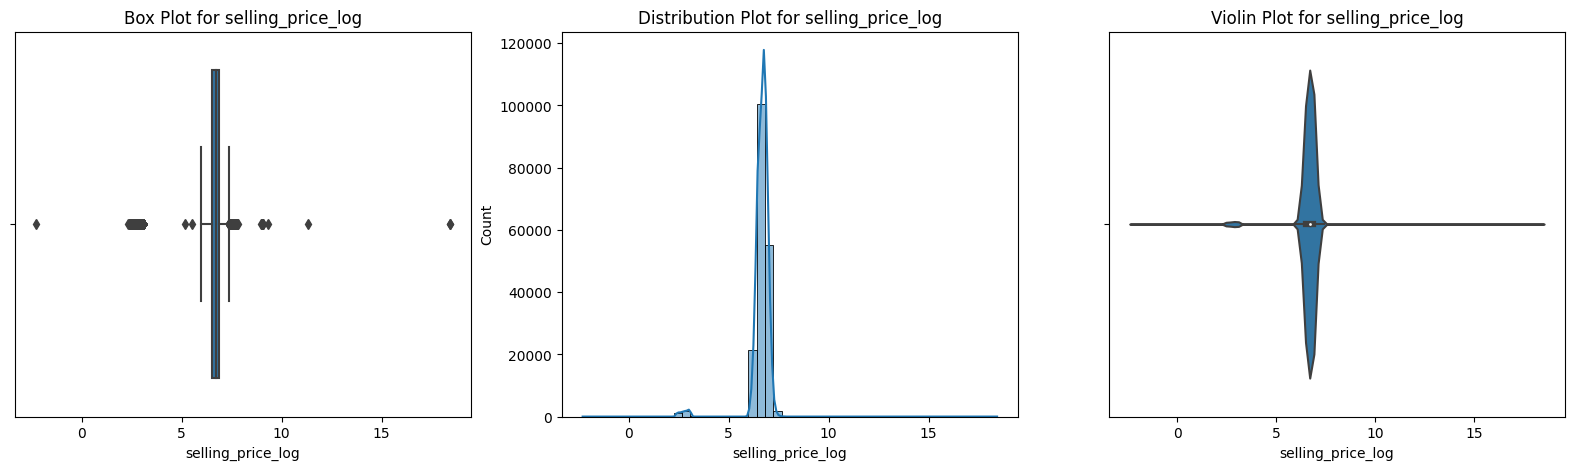

In [115]:
#After apply log
for i in ['quantity tons_log', 'country', 'application', 'thickness_log', 'width', 'selling_price_log']:
    plot(df_p, i)

<Axes: >

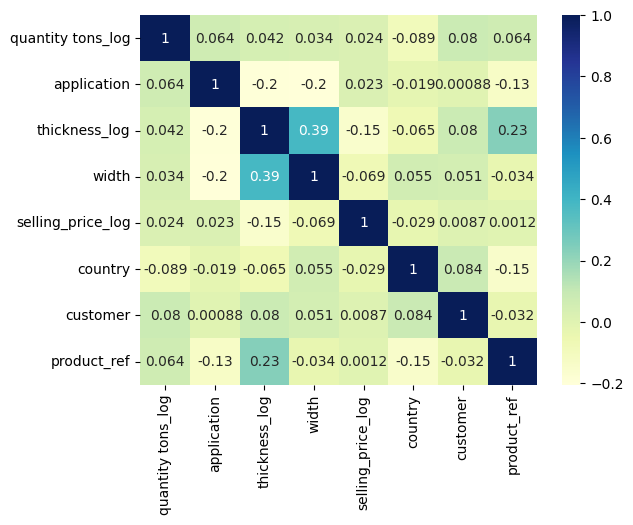

In [117]:
x=df_p[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()
sns.heatmap(x, annot=True, cmap="YlGnBu")

Model selection

In [118]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [119]:
df_p.isnull().sum()
df_p=df_p.dropna()

In [120]:
# find best algorithm for prediction based on R2, mean absolute error, mean squared error and root mean squared error values

def machine_learning_delivery_date(df, algorithm):

    X=df_p[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
    y=df_p['selling_price_log']
    # encoding categorical variables
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(X[['item type']])
    X_ohe = ohe.fit_transform(X[['item type']]).toarray()
    ohe2 = OneHotEncoder(handle_unknown='ignore')
    ohe2.fit(X[['status']])
    X_be = ohe2.fit_transform(X[['status']]).toarray()
    # independent features after encoding
    X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'Algorithm': str(algorithm).split("'")[1].split(".")[-1],
               'R2': r2,
               'Mean Absolute Error': mae,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}

    return metrics

In [121]:
print(machine_learning_delivery_date(df_p, DecisionTreeRegressor))
print(machine_learning_delivery_date(df_p, ExtraTreesRegressor))
print(machine_learning_delivery_date(df_p, RandomForestRegressor))
print(machine_learning_delivery_date(df_p, AdaBoostRegressor))
print(machine_learning_delivery_date(df_p, GradientBoostingRegressor))
print(machine_learning_delivery_date(df_p, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2': 0.8947700678360233, 'Mean Absolute Error': 0.12409542374284738, 'Mean Squared Error': 0.036229508488738904, 'Root Mean Squared Error': 0.1903405066945523}
{'Algorithm': 'ExtraTreesRegressor', 'R2': 0.9139860647372331, 'Mean Absolute Error': 0.11107999678597331, 'Mean Squared Error': 0.027875077221356993, 'Root Mean Squared Error': 0.1669583098301998}
{'Algorithm': 'RandomForestRegressor', 'R2': 0.9357782148676224, 'Mean Absolute Error': 0.10456396678677424, 'Mean Squared Error': 0.0206805550686493, 'Root Mean Squared Error': 0.14380735401449155}
{'Algorithm': 'AdaBoostRegressor', 'R2': 0.461022019676501, 'Mean Absolute Error': 0.3121275763472634, 'Mean Squared Error': 0.16577050650177147, 'Root Mean Squared Error': 0.40714924352351617}
{'Algorithm': 'GradientBoostingRegressor', 'R2': 0.8957026744525839, 'Mean Absolute Error': 0.15357467039042846, 'Mean Squared Error': 0.03292009880516349, 'Root Mean Squared Error': 0.181438967162965}
{'Algor

DECISION TREE REGRESSOR
1. Encode categorical features
2. Test and Train split
3. Define Hyperparameters for GridSearchCV
4. Train the DecisionTreeRegressor with best parameters
5. Evalution metrics
6. Predict the selling price for new values
7. Save the DecisionTreeRegressor model

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

X=df_p[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df_p['selling_price_log']
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# decision tree
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean squared error: 0.022943281387469424
R-squared: 0.9287853955913805


In [123]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [706.961582]


In [124]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

**DECISION TREE CLASSIFIER**

In [126]:
df_c = df_p[df_p['status'].isin(['Won', 'Lost'])]
len(df_c)

150427

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

Y = df_c['status']
X= df_c[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y)
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9126836402313369
Confusion Matrix:
[[ 5699  1303]
 [ 1324 21760]]


Confusion Matrix:
[[ 5699  1303]
 [ 1324 21760]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7002
           1       0.94      0.94      0.94     23084

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086



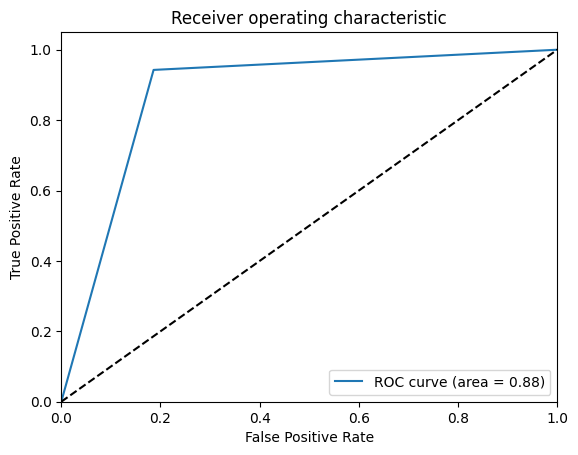

In [128]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [129]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [130]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)